### Starting Off?

You are a data scientist for the MTA. For your first project, they want you to predict the number of subway riders for each day. You decide to do a linear regression model predict the riders but need to gather data first. With a partner brainstorm a list of different variables you think would explain the number of daily riders.  

# Multiple Linear Regression
Agenda Today:

- Create a model for multiple linear regression
- Interpret the output for multiple linear regression
- Multicollinearity



In [1]:
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [2]:
#read in car data
df = sns.load_dataset('mpg')


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

lr_model = ols(formula='mpg~weight', data=df).fit()

In [5]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          2.97e-103
Time:                        15:24:58   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regression
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the proportion of variance explained by the model. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?


$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$

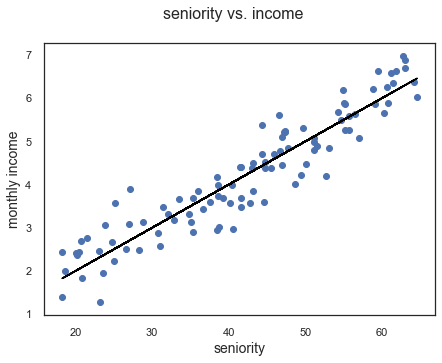

In [6]:
np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

What if we include another factor, such as years of education? All that is doing is adding a higher dimensional object to the model, so our model will be three dimensional. 
<img src="multi_reg_graph.png" style="withd:300px;">

### There are 3 major uses for multiple linear regression analysis.  

1. Useful to identify the strength of the effect that the independent variables have on a dependent variable.

2. Forecast effects or impacts of changes.  That is, multiple linear regression analysis helps us to understand how much will the dependent variable change when we change the independent variables.  For instance, a multiple linear regression can tell you how much GPA is expected to increase (or decrease) for every one point increase (or decrease) in IQ.

3. Predicts trends and future values.  The multiple linear regression analysis can be used to get point estimates.  An example question may be “what will the price of gold be 6 month from now?”

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
mlr_model = ols(formula='mpg~weight+horsepower+displacement+cylinders+acceleration', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          9.82e-101
Time:                        15:27:55   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2643      2.669     17.331      0.000      41.016      51.513
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretation of the Model Parameters
- Each β parameter represents the change in the mean response, E(y), per unit increase in the associated predictor variable when all the other predictors are held constant.
- For example, β1 represents the estimated change in the mean response, E(y), per unit increase in x1 when x2, x3, ..., xp−1 are held constant.
- The intercept term, β0, represents the estimated mean response, E(y), when all the predictors x1, x2, ..., xp−1, are all zero (which may or may not have any practical meaning).

___

## Multicollinearity 

**Multicollinearity** occurs when independent variables in a regression model are very highly correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant.

There are two basic kinds of multicollinearity:

- **Structural multicollinearity:** This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.
- **Data multicollinearity:** This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

### What Problems Do Multicollinearity Cause?

Multicollinearity causes the following two basic types of problems:

- The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
- Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

### Do I Have to Fix Multicollinearity?

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. 
- Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

***That being said, the easies way to deal with multicollinearity is just to remove one of the variables***

In [9]:

# Compute the correlation matrix
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


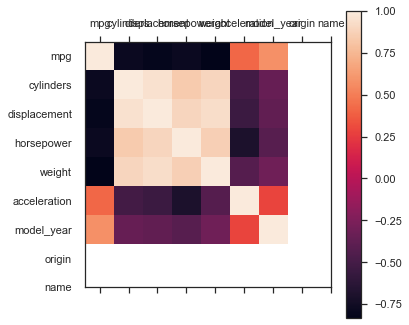

In [10]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Create a Better Looking Heatmap with Seaborn

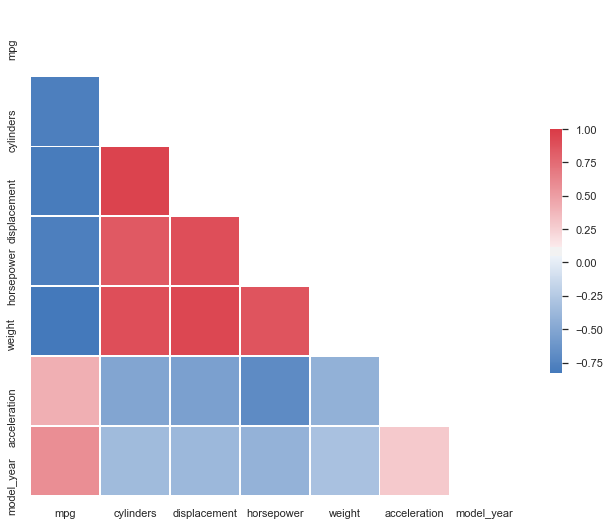

In [11]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

Even more examples to make your correlation heatmap look good
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

### Rerun the Model After Removing the highly correlate variables

In [12]:
mlr_model = ols(formula='mpg~weight+horsepower+cylinders+acceleration', data=df).fit()
mlr_model.summary()


#r2 didnt go down at all. when validating your model you must check for collineabrity



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     234.2
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          6.02e-102
Time:                        15:45:07   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     387   BIC:                             2270.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2740      2.448     18.902      0.000      41.461      51.087
weight          -0.0052      0.001     -7.070      0.000      -0.007      -0.004
horsepower      -0.0453      0.016     -2.820      0.005      -0.077      -0.014
cylinders       -0.4005      0.303     -1.321      0.187      -0.997       0.196
acceleration    -0.0290      0.125     -0.232      0.817      -0.275       0.217
==============================================================================
Omnibus:                       38.540   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.705
Skew:                           0.706   Prob(JB):                     3.59e-12
Kurtosis:                       4.111   Cond. No.                     3.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


if you want to say multipliy a coefficient with a categorical variable like origin you cant becasue it would be a type-error. what you do then is create a dummy variable.

### Handling Categorical Data



In [14]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

For the column of `origin`, we can see that the values come through as strings that represent a category.  We can not put a string through as a value for a linear model. Instead we use dummy variables.

A **dummy variable** (aka, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.

Technically, dummy variables are dichotomous, quantitative variables. Their range of values is small; they can take on only two quantitative values. As a practical matter, regression results are easiest to interpret when dummy variables are limited to two specific values, 1 or 0. Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

In [15]:
pd.get_dummies(df['origin'])

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


By creating these dummy variables. We can now include them in the model.  

In [16]:
pd.get_dummies(df, columns=['origin'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,0,0,1


In [17]:
dummy_df = pd.get_dummies(df, columns=['origin'])

In [18]:
dummy_model = ols(formula='mpg~weight+horsepower+cylinders+acceleration+origin_europe+origin_japan', data=dummy_df).fit()
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          4.20e-103
Time:                        16:08:43   Log-Likelihood:                -1111.8
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     385   BIC:                             2265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        43.7601      2.502     17.488      0.000      38.840      48.680
weight           -0.0044      0.001     -5.956      0.000      -0.006      -0.003
horsepower       -0.0548      0.016     -3.433      0.001      -0.086      -0.023
cylinders        -0.2515      0.307     -0.820      0.412      -0.854       0.351
acceleration     -0.0454      0.123     -0.369      0.712      -0.287       0.196
origin_europe     0.8492      0.663      1.282      0.201      -0.454       2.152
origin_japan      2.6731      0.661      4.043      0.000       1.373       3.973
==============================================================================
Omnibus:                       38.033   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.486
Skew:                           0.676   Prob(JB):                     1.47e-12
Kurtosis:                       4.229   Cond. No.                     3.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You might have noticed that I did not include the `origin_usa` column in this model.

That dummy variable would redundant; it carries no new information. And it creates a severe multicollinearity problem for the analysis. 

If we know the value of the `origin_europe` and the `origin'japan` columns, then we also know the value of the `origin_usa` column.

Using all the dummy variables off a category, is known as the dummy variable trap. Avoid this trap!

There are tow ways to handle this. One is as seen above where I just don't include one of the variables in the model. Another is to automatically drop one of the columns when I use `pd.get_dummies`

In [ ]:
pd.get_dummies(df, columns=['origin'], drop_first=True)

### Interpreting the coefficients of Dummy Variables

So how do we interpret the coefficient of a dummy variable? Looking at our model output from above. If a car originated in Japan, it will have a value of 1 for the variable `origin_japan`. So we would multiply the value of 1 by the coefficient for that variable and add that to our final MPG prediction.  

If the car orginated in the USA it would have a value of zero for both the `origin_japan` and `origin_europe` columns. Therefore, the coefficients for those variables who not impact the final prediction.  

___

**On average what is the difference in the gas mileage for cars from Japan verus cars from USA in this dataset?**

**On average what is the difference in the gas mileage for cars from Japan verus cars from Europe in this dataset?**

on average cars from japan get 2.6731 more mpg than cars from USA.
on average cars from japan get 1.83 more than cars from europe(2.6731 - 0.8492)

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

## Scaling Data


Most of the times, your dataset will contain features highly varying in magnitudes, units and range. For linear regression models, this makes it difficult to compare the sizes of the coefficients for different variables. Also, many machine learning algorithms use Eucledian distance between two data points in their computations, and data of different scale, distorts those distances.

Three common ways to scale the data are:
1. **Standardization**: This redistributes the features with their mean μ = 0 and standard deviation σ =1 . sklearn.preprocessing.scale helps us implementing standardisation in python. 
$$x' =\frac{x-\bar{x}}{\sigma}$$

2. **Mean Normalization**: This distribution will have values between -1 and 1 with μ=0.

$$x' =\frac{x-\bar{x}}{max(x)- min(x)}$$

3. **Min-Max Scaling**: This scaling brings the value between 0 and 1.

$$x' =\frac{x-min(x)}{max(x)- min(x)}$$



https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit_transform(dummy_df)


ValueError: could not convert string to float: 'chevrolet chevelle malibu'

In [21]:
dummy_df.drop(['name', 'origin_usa'], axis=1, inplace=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,0,0


In [22]:
scaler.fit_transform(dummy_df)


ValueError: could not convert string to float: 'chevrolet chevelle malibu'

In [ ]:
Another way to use the 

In [23]:
dummy_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')

In [24]:
subset= ['cylinders', 'horsepower', 'weight',
       'acceleration', 'origin_europe', 'origin_japan']

In [25]:
subset_scaled = []
for var in subset:
    new_col = var +"_scaled"
    dummy_df[new_col] = scaler.fit_transform(dummy_df[[var]])
    subset_scaled.append(new_col)

In [26]:
dummy_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa,cylinders_scaled,horsepower_scaled,weight_scaled,acceleration_scaled,origin_europe_scaled,origin_japan_scaled
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0,1,1.498191,0.664133,0.630870,-1.295498,-0.461968,-0.497643
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,0,1,1.498191,1.574594,0.854333,-1.477038,-0.461968,-0.497643
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,0,1,1.498191,1.184397,0.550470,-1.658577,-0.461968,-0.497643
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,0,1,1.498191,1.184397,0.546923,-1.295498,-0.461968,-0.497643
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,0,1,1.498191,0.924265,0.565841,-1.840117,-0.461968,-0.497643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,0,0,1,-0.856321,-0.480448,-0.213324,0.011586,-0.461968,-0.497643
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,1,0,0,-0.856321,-1.364896,-0.993671,3.279296,2.164651,-0.497643
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,0,0,1,-0.856321,-0.532474,-0.798585,-1.440730,-0.461968,-0.497643
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,0,0,1,-0.856321,-0.662540,-0.408411,1.100822,-0.461968,-0.497643


In [28]:
scaled_model = ols(formula='mpg~weight_scaled+horsepower_scaled+cylinders_scaled+origin_europe_scaled+origin_japan_scaled', data=dummy_df).fit()
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          3.04e-104
Time:                        16:29:46   Log-Likelihood:                -1111.9
No. Observations:                 392   AIC:                             2236.
Df Residuals:                     386   BIC:                             2260.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               23.4765      0.210    111.730      0.000      23.063      23.890
weight_scaled           -3.8591      0.553     -6.974      0.000      -4.947      -2.771
horsepower_scaled       -1.9497      0.445     -4.381      0.000      -2.825      -1.075
cylinders_scaled        -0.3996      0.515     -0.776      0.438      -1.412       0.613
origin_europe_scaled     0.3180      0.252      1.264      0.207      -0.177       0.813
origin_japan_scaled      1.0624      0.263      4.037      0.000       0.545       1.580
==============================================================================
Omnibus:                       36.677   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.612
Skew:                           0.664   Prob(JB):                     6.20e-12
Kurtosis:                       4.182   Cond. No.                         5.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our coefficients are on a similiar scale which allows us to compare the size of the coeffiecents to make some inferences about which features have a bigger impact on the MPG of a car

now that everything is scaled, for weight, the interpretatin is a one sdev increase in weight reduces miles per gallon by 3.859 mpg

## Resources

Everything about regression:  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples

Statsmodels example: https://datatofish.com/statsmodels-linear-regression/